# Harmonic Oscillator

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm
from hamilton_class import HamiltonSystem
from plot_class import Plotter
from nambu_class import NambuSystem

### Single initial condition using Hamilton dynamics


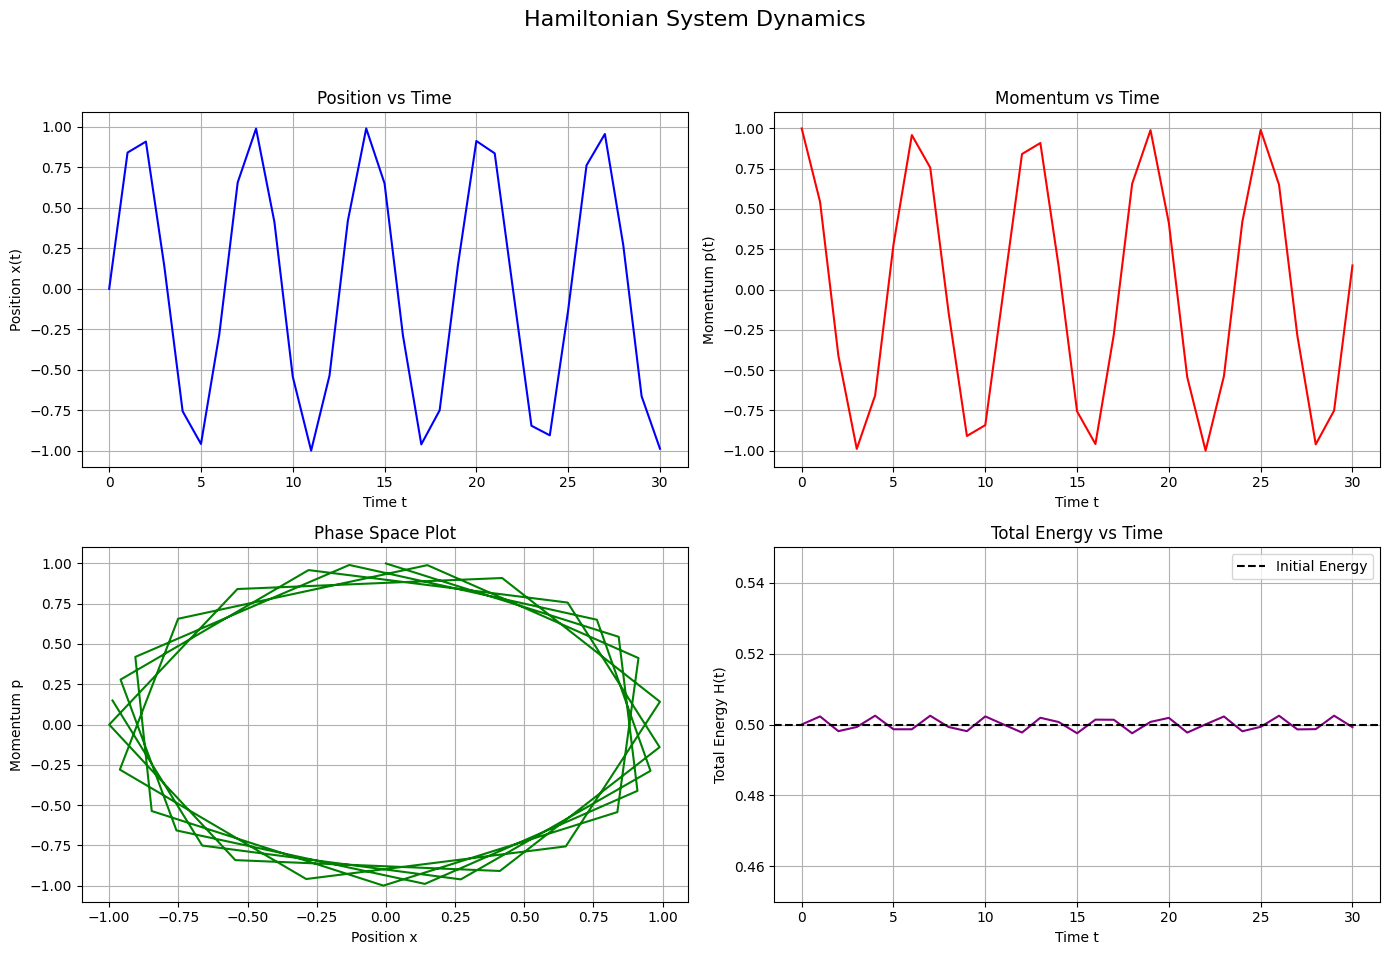

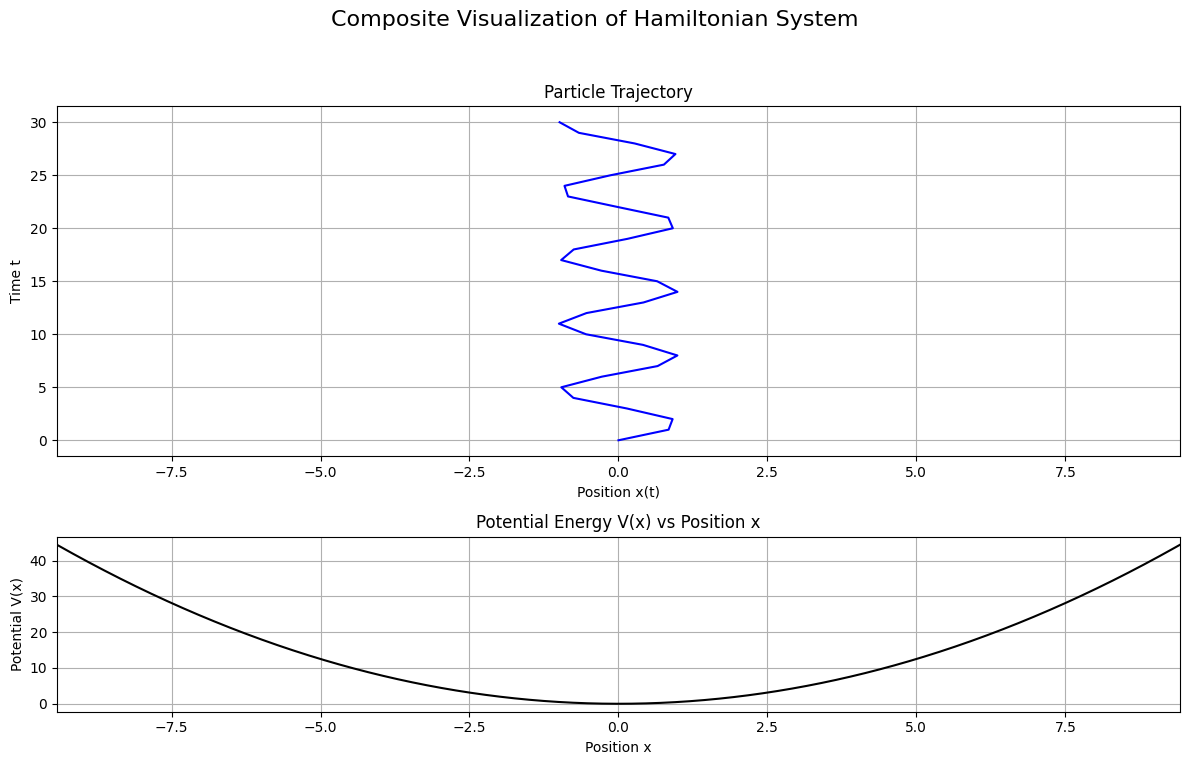

In [2]:
# Define the parameters
k1 = 1.0  # Spring constant
m = 1.0  # Mass
t_max = 30.0  # Maximum time
delta_t = 0.01  # Time step

def p_dot(x, p):
    return -k1 * x  # For a simple harmonic oscillator, dp/dt = -k x

def x_dot(x, p):
    return p / m  # For a simple harmonic oscillator, dx/dt = p / m

# Create Hamiltonian system
hamilton_system = HamiltonSystem(p_dot, x_dot, t_max, delta_t)

# Fixed initial condition
x0, p0 = 0.0, 1.0

# Simulate for the fixed initial condition
t_array, x_array, p_array = hamilton_system.simulate(x0, p0)

# Sample the data
t_sampled, x_sampled, p_sampled = hamilton_system.sample_data(t_array, x_array, p_array)

# Calculate energy
energy_sampled = 0.5 * (p_sampled**2) / m + k1 * (x_sampled**2) / 2
potential = lambda x: k1 * (x**2) / 2

# Plotting
plotter = Plotter()
plotter.static_plots(t_sampled, x_sampled, p_sampled, energy_sampled)
plotter.composite_plot(x_sampled, t_sampled, potential)

### Single initial condition using Nambu dynamics

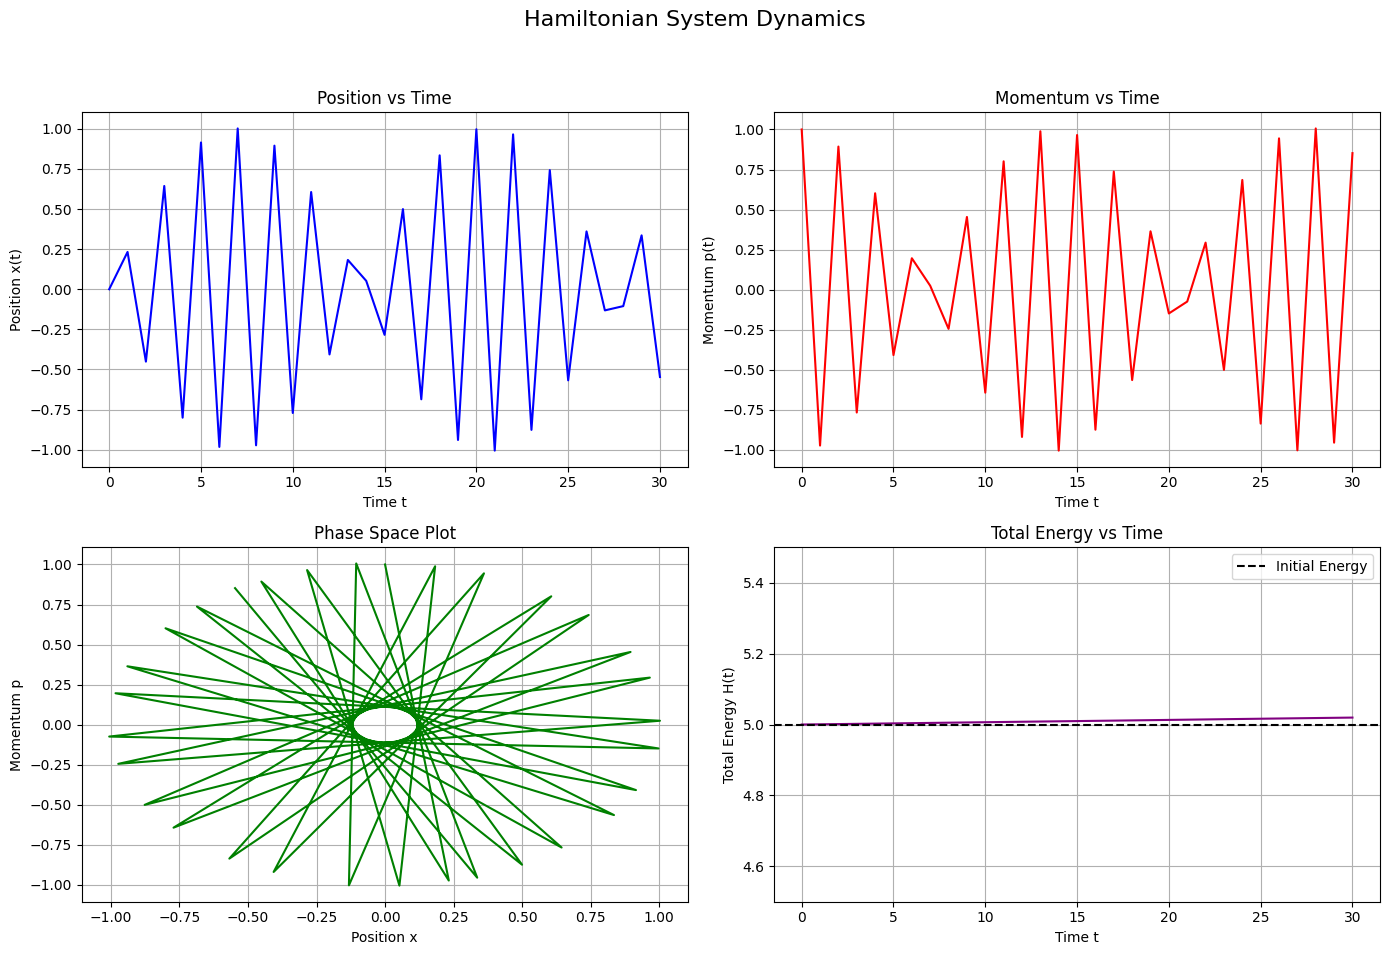

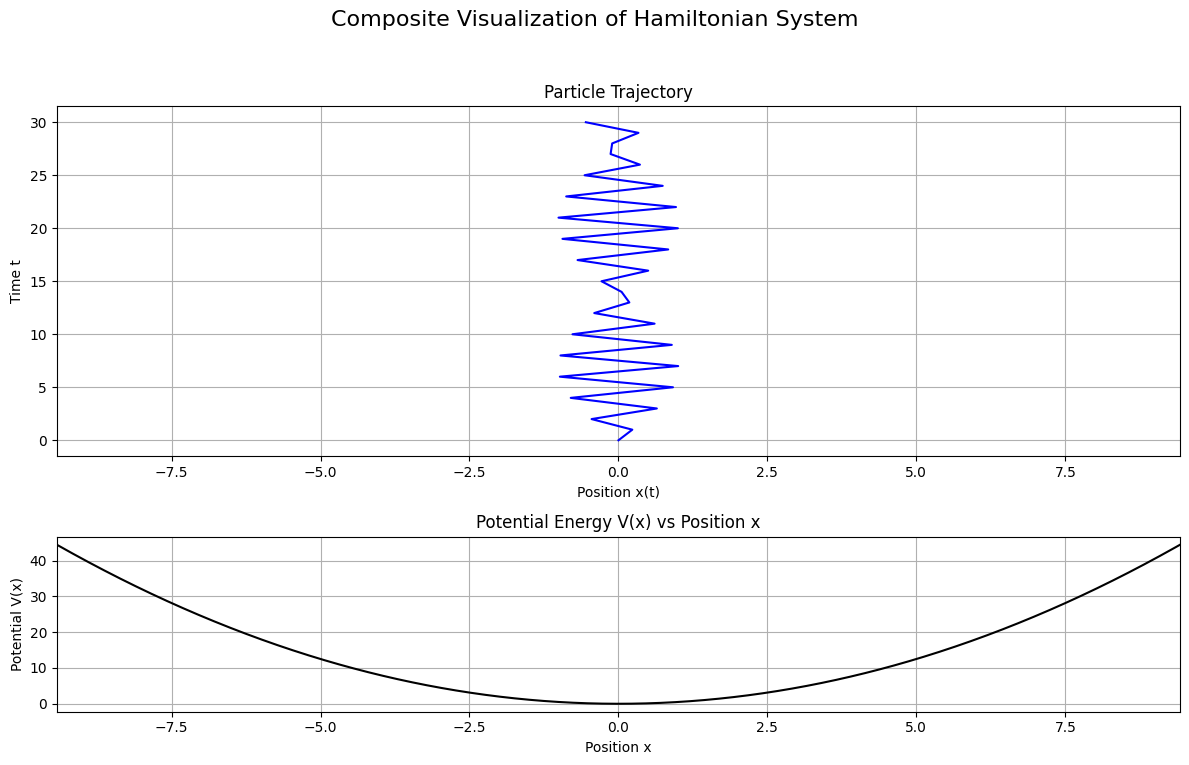

In [9]:
'''
H = p^2 / 2m + kx^2 / 2 + r^2 / 2m
G = r^2 / 2m + kx^2 / 4

x_dot = dH/dp * dG/dr - dH/dr * dG/dp
p_dot = dH/dr * dG/dx - dH/dx * dG/dr
r_dot = dH/dx * dG/dp - dH/dp * dG/dx
'''
# Input settings
k2 = 2.0  # Spring constant
m = 1.0  # Mass
t_max = 30.0  # Maximum time for simulation
delta_t = 0.0001  # Time step

# Define the Nambu dynamics equations
def x_dot(x, p, r):
    return p * r

def p_dot(x, p, r):
    return -(k2 / 2) * r * x

def r_dot(x, p, r):
    return -(k2 / 2) * p * x

# Initial conditions
x0 = 0.0
p0 = 1.0
r0 = 3.0

nambu_system = NambuSystem(x_dot, p_dot, r_dot, t_max, delta_t)

t_array, x_array, p_array, r_array = nambu_system.simulate(x0, p0, r0)

t_sampled, x_sampled, p_sampled, r_sampled = nambu_system.sample_data(t_array, x_array, p_array, r_array)

from plot_class import Plotter
energy_sampled = 0.5 * (p_sampled**2) / m + 0.5 * (r_sampled**2) / m + k2 * (x_sampled**2) / 2
potential = lambda x: k1 * (x**2) / 2 # * think about use which potential

plotter = Plotter()
plotter.static_plots(t_sampled, x_sampled, p_sampled, energy_sampled)
plotter.composite_plot(x_sampled, t_sampled, potential)

### Sampling different initial conditions

In [4]:
def sample_initial_conditions(N, psigma=1):
    """
    Sample N initial conditions p0 with probability proportional to exp(-p0^2 / 2m),

    Parameters:
        N (int): Number of samples to generate.
        psigma (float): Standard deviation for p0 sampling.

    Returns:
        List of tuples: [(x0_1, p0_1), (x0_2, p0_2), ..., (x0_N, p0_N)]
    """
    samples = []
    attempts = 0
    max_attempts = N

    while len(samples) < N and attempts < max_attempts:
        p0 = np.random.normal(0, psigma)
        samples.append(p0)
        attempts += 1
        
    if len(samples) < N:
        raise RuntimeError(f"Could not generate {N} samples within {max_attempts} attempts.")

    return samples


>>> Generated 1000 sets of p0 satisfies p(p0) ∝ exp(-p0^2 / 2m)


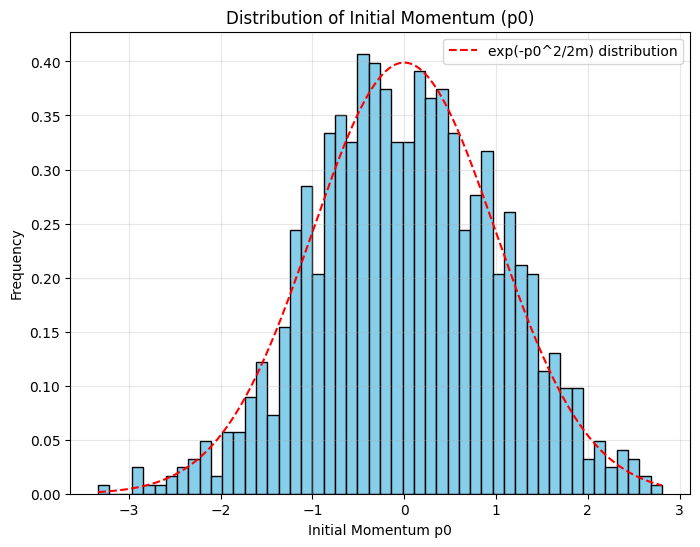

In [5]:
Nsamp = 1000
sampled_p0 = sample_initial_conditions(N=Nsamp, psigma=np.sqrt(m))

print(f"\n>>> Generated {Nsamp} sets of p0 satisfies p(p0) ∝ exp(-p0^2 / 2m)")

# Create a histogram of x0_samples
plt.figure(figsize=(8, 6))
plt.hist(sampled_p0, bins=50, color='skyblue', edgecolor='black', density=True)
# Add theoretical distribution line
x_range = np.linspace(min(sampled_p0), max(sampled_p0), 1000)
theoretical_dist = np.exp(-x_range**2 / 2 / m) / np.sqrt(2 * np.pi)  # Normalized Gaussian distribution
plt.plot(x_range, theoretical_dist, color='red', linestyle='--', label='exp(-p0^2/2m) distribution')
plt.title("Distribution of Initial Momentum (p0)")
plt.xlabel("Initial Momentum p0")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()



### Calculate the Pmax(x; x0)

>>> Using Hamiltonian Dynamics: 


Loop in samples: 100%|██████████| 1000/1000 [00:02<00:00, 465.80it/s]
/tmp/ipykernel_241241/1511117883.py:15: RuntimeWarning: invalid value encountered in divide
  theoretical_dist = 0.5 * np.sqrt(k1 / (2 * np.pi)) * x_range / np.sqrt(x_range**2 - x0**2) * np.exp(-k1/2 * (x_range**2 - x0**2))


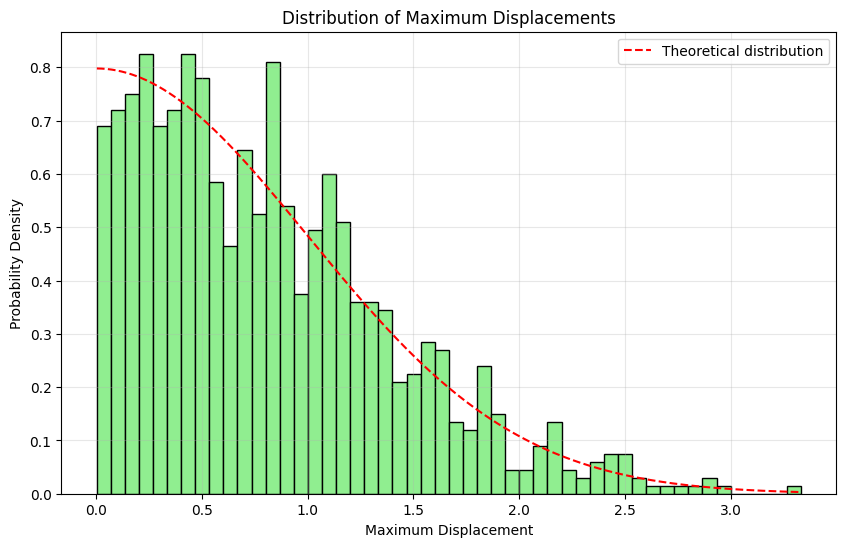

In [6]:
print(">>> Using Hamiltonian Dynamics: ")
x0 = 0.0
displacement_ls = []
for p0 in tqdm(sampled_p0, desc="Loop in samples"):
    t_array, x_array, p_array = hamilton_system.simulate(x0, p0)
    displacement_ls.append((np.max(x_array) - np.min(x_array)) / 2)

# Create histogram of displacements
# * theoretical distribution is 1/2 * sqrt(k / (2 pi)) * x / sqrt(x^2 - x0^2) * exp(- k / 2 * (x^2 - x0^2))
plt.figure(figsize=(10, 6))
plt.hist(displacement_ls, bins=50, color='lightgreen', edgecolor='black', density=True)

# Calculate theoretical distribution
x_range = np.linspace(0, max(displacement_ls), 1000)
theoretical_dist = 0.5 * np.sqrt(k1 / (2 * np.pi)) * x_range / np.sqrt(x_range**2 - x0**2) * np.exp(-k1/2 * (x_range**2 - x0**2))

# Normalize theoretical distribution
theoretical_dist_normalized = theoretical_dist * 4

# Plot theoretical distribution
plt.plot(x_range, theoretical_dist_normalized, 
         color='red', linestyle='--', label='Theoretical distribution')
plt.legend()

plt.title("Distribution of Maximum Displacements")
plt.xlabel("Maximum Displacement")
plt.ylabel("Probability Density")
plt.grid(True, alpha=0.3)
plt.show()


>>> Using Nambu Dynamics: 


Loop in samples: 100%|██████████| 1000/1000 [06:38<00:00,  2.51it/s]
/tmp/ipykernel_241241/1030989876.py:16: RuntimeWarning: invalid value encountered in divide
  theoretical_dist = 0.5 * np.sqrt(k1 / (2 * np.pi)) * x_range / np.sqrt(x_range**2 - x0**2) * np.exp(-k1/2 * (x_range**2 - x0**2))


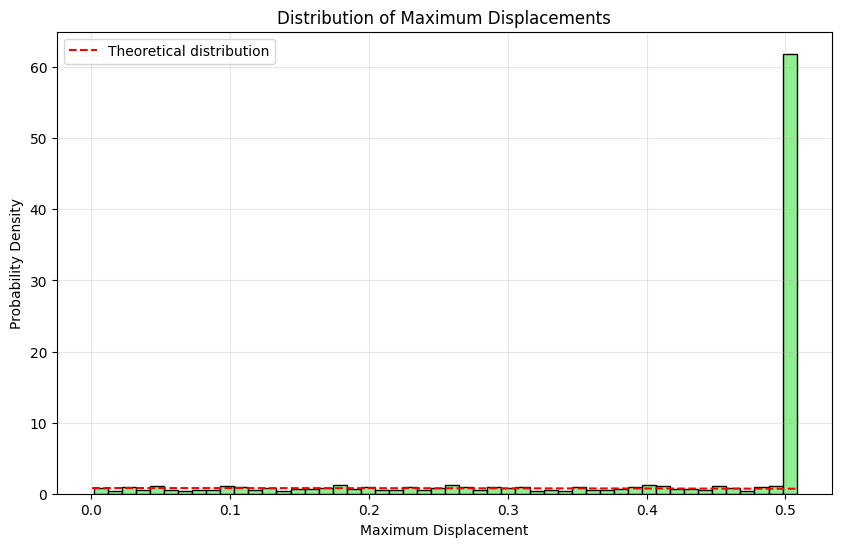

In [7]:
print(">>> Using Nambu Dynamics: ")
x0 = 0.0
displacement_ls = []
for p0 in tqdm(sampled_p0, desc="Loop in samples"):
    r0 = 0.5
    # r0 = np.random.normal(0, 1.0)
    t_array, x_array, p_array, r_array = nambu_system.simulate(x0, p0, r0)
    displacement_ls.append((np.max(x_array) - np.min(x_array)) / 2)

# Create histogram of displacements
plt.figure(figsize=(10, 6))
plt.hist(displacement_ls, bins=50, color='lightgreen', edgecolor='black', density=True)

# Calculate theoretical distribution
x_range = np.linspace(0, max(displacement_ls), 1000)
theoretical_dist = 0.5 * np.sqrt(k1 / (2 * np.pi)) * x_range / np.sqrt(x_range**2 - x0**2) * np.exp(-k1/2 * (x_range**2 - x0**2))

# Normalize theoretical distribution
theoretical_dist_normalized = theoretical_dist * 4

# Plot theoretical distribution
plt.plot(x_range, theoretical_dist_normalized, 
         color='red', linestyle='--', label='Theoretical distribution')
plt.legend()

plt.title("Distribution of Maximum Displacements")
plt.xlabel("Maximum Displacement")
plt.ylabel("Probability Density")
plt.grid(True, alpha=0.3)
plt.show()

### Test